In [39]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import ModelEvaluation as me
reload(me)

<module 'ModelEvaluation' from 'ModelEvaluation.py'>

In [44]:
DF = pd.read_pickle('../data/numericalFts_100kUsers_ChallengerV1.pkl')

print 'Total Size of Dataset: %d' % DF.shape[0]
print 'Total Unique Users: %d\n\n' % len(DF.ILINK.unique().tolist())

X_features = ['REF_DATE_MONTH',
             'REF_DATE_YEAR',
             'NUM_PAST_ORDERS',
             'SUM_PAST_SHIPPED_SOLD_AMT',
             'AVG_PAST_SHIPPED_SOLD_AMT',
             'STDDEV_PAST_SHIPPED_SOLD_AMT',
             'VAR_PAST_SHIPPED_SOLD_AMT',
             'SUM_PAST_DISCOUNT',
             'AVG_PAST_DISCOUNT',
             'STDDEV_PAST_DISCOUNT',
             'VAR_PAST_DISCOUNT']
dependent = 'BOUGHT_PANTS'

print 'Input features: \n%s\n' % X_features
print 'Dependent feature: %s\n\n' % dependent

train = DF.ILINK.unique().tolist()[:80000]
test = DF.ILINK.unique().tolist()[-20000:]
DFTrain = DF[DF.ILINK.isin(train)]
DFTest = DF[DF.ILINK.isin(test)]

X_train = DFTrain[X_features]
y_train = DFTrain[dependent]

X_test = DFTest[X_features]
y_test = DFTest[dependent]

Total Size of Dataset: 274873
Total Unique Users: 100000


Input features: 
['REF_DATE_MONTH', 'REF_DATE_YEAR', 'NUM_PAST_ORDERS', 'SUM_PAST_SHIPPED_SOLD_AMT', 'AVG_PAST_SHIPPED_SOLD_AMT', 'STDDEV_PAST_SHIPPED_SOLD_AMT', 'VAR_PAST_SHIPPED_SOLD_AMT', 'SUM_PAST_DISCOUNT', 'AVG_PAST_DISCOUNT', 'STDDEV_PAST_DISCOUNT', 'VAR_PAST_DISCOUNT']

Dependent feature: BOUGHT_PANTS




In [51]:
DF.head()

,ILINK,REF_DATE_MONTH,REF_DATE_YEAR,MOST_RECENT_PAST_ORDER_DATE,NUM_PAST_ORDERS,SUM_PAST_SHIPPED_SOLD_AMT,AVG_PAST_SHIPPED_SOLD_AMT,STDDEV_PAST_SHIPPED_SOLD_AMT,VAR_PAST_SHIPPED_SOLD_AMT,SUM_PAST_DISCOUNT,AVG_PAST_DISCOUNT,STDDEV_PAST_DISCOUNT,VAR_PAST_DISCOUNT,BOUGHT_DRESSES,BOUGHT_KNIT TOPS,BOUGHT_OTHER,BOUGHT_PANTS,BOUGHT_WOVEN SHIRTS
0,0000000490,1.0,2018.0,2018-01-10,3,193.90,64.633333,4.041452,16.333333,83.10,27.700000,1.732051,3.000000,0,1,1,1,0
1,0000000490,2.0,2018.0,2018-02-19,3,193.90,64.633333,4.041452,16.333333,83.10,27.700000,3.535534,12.500000,0,1,1,1,1
2,0000000490,3.0,2018.0,2018-03-01,4,132.98,39.000000,6.951741,48.326700,55.00,27.500000,16.007811,256.250000,0,1,1,0,1
3,0000000741,1.0,2018.0,2018-01-04,3,75.97,28.490000,2.742414,7.520833,74.00,24.666667,2.742414,7.520833,0,0,0,0,1
4,0000000741,3.0,2018.0,2018-03-29,37,1202.95,46.305000,14.260138,203.351536,575.79,15.561892,10.335407,106.820633,1,1,1,1,1


In [45]:
#random_state = 42 to insure same random split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [46]:
grid = pd.read_pickle('../models/RFC_PantsVsAll_ChallengerV1_100k.pkl')

In [47]:
y_test.value_counts()
#print (y_test == 1).count()

1    26348
0    25471
Name: BOUGHT_PANTS, dtype: int64

Validation Score Accuracy: 77.65% +/- 0.17%
Train Score Accuracy: 97.51% +/- 0.01%


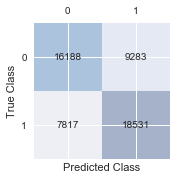

Accuracy: 0.67
Missclassification Rate: 0.33
(1) Positive Rate(Recall): 0.70
(0) Positive Rate(Sensitivity): 0.64
Precision(proportion of predicted (1)): 0.67
Specificity(proportion of predicted (0): 0.67


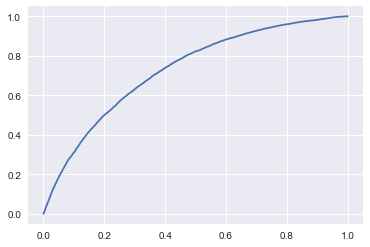

AUC(Area Under Curve) score: 0.728984


In [48]:
me.ModelEvalClassifier(grid,X_test,y_test)

In [49]:
pred = grid.predict(X_test)
y_test_0 = y_test.value_counts()[0]
y_test_1 = y_test.value_counts()[1]

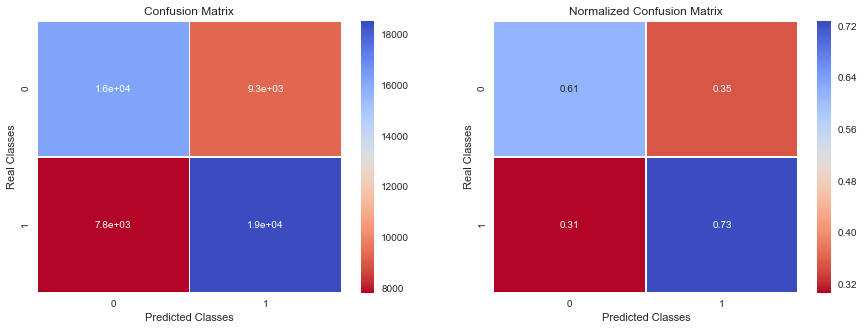

---Classification Report---
             precision    recall  f1-score   support

          0       0.67      0.64      0.65     25471
          1       0.67      0.70      0.68     26348

avg / total       0.67      0.67      0.67     51819



In [50]:
me.PlotConfusionMatrix(y_test,pred,y_test_1,y_test_0)